In [1]:
## dataset source from https://data.worldbank.org/indicator/SP.POP.TOTL

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn


In [3]:
api_df = pd.read_csv(r"C:\Users\albin\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_174326\API_SP.POP.TOTL_DS2_en_csv_v2_174326.csv", skiprows =4)
api_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [4]:
country_df =pd.read_csv(r"C:\Users\albin\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_174326\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_174326.csv")
country_df.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
country_df.isnull().sum()

Country Code      0
Region           48
IncomeGroup      50
SpecialNotes    133
TableName         0
Unnamed: 5      265
dtype: int64

In [6]:
api_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2021                1
2022                1
2023                1
2024                1
Unnamed: 69       266
Length: 70, dtype: int64

In [7]:
# Drop unnecessary column
api_df = api_df.drop(columns=["Unnamed: 69"], errors="ignore")



In [8]:
api_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,984846.0,1011421.0,1036950.0,1062737.0,1090270.0,1120168.0,...,1788274.0,1777568.0,1791019.0,1797086.0,1788891.0,1790151.0,1786079.0,1768096.0,1682668.0,1594353.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5532301.0,5655232.0,5782221.0,5911135.0,6048006.0,6195593.0,...,31159379.0,32109010.0,33090921.0,34085182.0,35111408.0,36134863.0,37140230.0,38222876.0,39390799.0,40583164.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,...,56723537.0,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,64007187.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3153729.0,3254086.0,3358099.0,3465907.0,3577017.0,3692086.0,...,16399089.0,16914423.0,17441320.0,17973569.0,18513839.0,19059395.0,19603607.0,20152938.0,20723965.0,21314956.0


In [9]:
# Remove empty rows
api_df = api_df.dropna(how="all")

In [10]:
# Identify year columns
year_cols = [col for col in api_df.columns if col.isdigit()]

In [11]:
# Convert year columns to numeric
api_df[year_cols] = api_df[year_cols].apply(pd.to_numeric, errors="coerce")

In [12]:
# Keep relevant columns
api_df = api_df[["Country Name", "Country Code"] + year_cols]

In [13]:
api_df.head(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107995.0
1,Africa Eastern and Southern,AFE,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750491370.0,769280888.0
2,Afghanistan,AFG,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,10266395.0,10505959.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0
3,Africa Western and Central,AFW,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,111246953.0,113795019.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0
4,Angola,AGO,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,5581386.0,5641807.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0


In [14]:
country_df = country_df[["Country Code", "Region", "IncomeGroup"]]
country_df = country_df.drop_duplicates()


In [15]:
country_df.head(5)

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,Middle East & North Africa,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income


In [16]:
country_df.isnull().sum()

Country Code     0
Region          48
IncomeGroup     50
dtype: int64

In [17]:
country_df = country_df[["Country Code", "Region", "IncomeGroup"]]
#drop duplicates records
country_df = country_df.drop_duplicates()


In [18]:
# merging datasets based on Country Code
merged_df = pd.merge(
    api_df,
    country_df,
    on="Country Code",
    how="left"
)


In [19]:
# Converting to long function to aggregate
df_long = merged_df.melt(
    id_vars=["Country Name", "Country Code", "Region", "IncomeGroup"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Population"
)

df_long["Year"] = df_long["Year"].astype(int)
df_long = df_long.dropna(subset=["Population"])


In [20]:
df_long["Region"] = df_long["Region"].fillna("Aggregate")
df_long["IncomeGroup"] = df_long["IncomeGroup"].fillna("Aggregate")


In [21]:
df_long.isnull().sum()

Country Name    0
Country Code    0
Region          0
IncomeGroup     0
Year            0
Population      0
dtype: int64

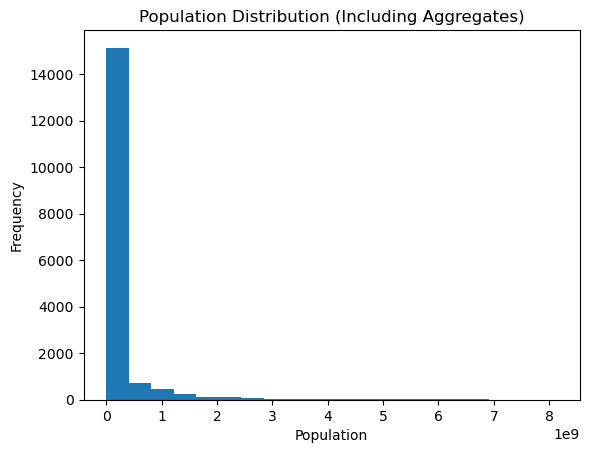

In [22]:
plt.figure()
plt.hist(df_long["Population"], bins=20)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.title("Population Distribution (Including Aggregates)")
plt.show()


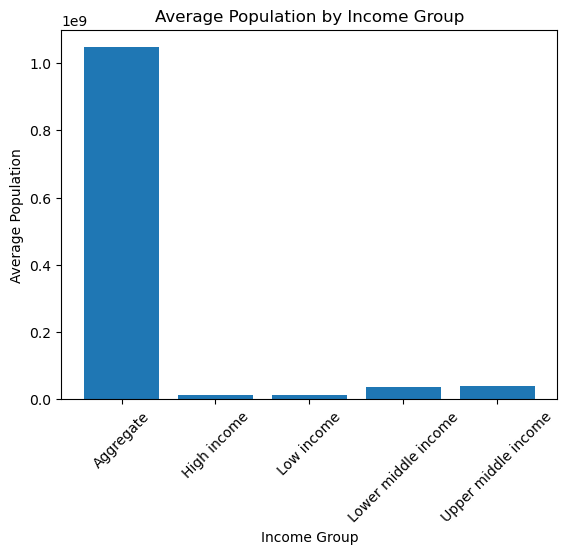

In [23]:
avg_pop = df_long.groupby("IncomeGroup")["Population"].mean()

plt.figure()
plt.bar(avg_pop.index, avg_pop.values)
plt.xlabel("Income Group")
plt.ylabel("Average Population")
plt.title("Average Population by Income Group")
plt.xticks(rotation=45)
plt.show()


## CONCLUSION
In this task, World Bank population data was cleaned and prepared for visualization. The original dataset contained population values in a wide format, with each year stored as a separate column, so it was reshaped into a long format to make analysis easier. Population data was merged with country metadata using country codes, and missing region and income group values were handled by labeling them as aggregate entries rather than applying misleading statistical imputation. A histogram was used to show the distribution of population values, while a bar chart was created to compare average population across income groups. Overall, the visualizations clearly illustrate global population patterns and differences between economic categories.